# 第一部分：获取数据

## 包括以下几个方面：
    一，大众点评关于幼教机构的机构信息，用户评论信息。
    二，西安市各地区人口信息。   
    三，西安各地区经济信息。  
    四，西安各地区小学数量。  
    等。

# 一，大众点评信息的获取

手段：基于python的网络爬虫。应用request，beautiful等库，构建用户代理池等反爬取手段，获取信息存储至Mysql数据库。  
遇到困难：  
1，大众点评会封掉短时间内访问过多的ip。解决办法：购买稳定网络代理。设置随机生成的爬取间隔，缺点是导致爬取效率较低.  
2，评论中有部分emoji表情等内容无法存储。解决办法：正则表达式暴力删掉，或更改数据库的存储字符。  
3，部分信息不完全，店铺页面格式不同。 解决办法：爬取时判断，没有的信息用占位符号代替。  
4，多次访问后，大众点评需要输入验证码。解决办法：检测输入验证码的页面，终止程序并手动输入。设计断点续传程序方便下次继续。  

从点评信息中可以获取的内容：  
各地区机构的数量  
各地区机构的总体评价  
等

## 截图展示

### 1， 大众点评爬虫

![大众点评爬虫](./截图展示/爬虫展示.png)

### 2数据库字段设计

### 2.1店铺信息表

#### 字段设计
![店铺信息表](./截图展示/shopinfo.png)

#### 内容展示
![店铺信息表内容](./截图展示/Infocontent.png)

### 2.2店铺评分统计表

#### 字段设计
![店铺评分](./截图展示/shoprank.png)

#### 内容展示
![店铺评分](./截图展示/rankcontent.png)

### 2.3店铺评论表

#### 字段设计
![评论表](./截图展示/shopcomment.png)

#### 内容展示
![评论表](./截图展示/commentcontent.png)

# 二，西安各地区人口获取

数据来源：西安市统计局

In [10]:
XianPopulation = {
    '西安':883.21
    }
areaPopulation ={
        '新城区':60.91,
        '碑林区':63.87,
        '莲湖区':72.23,
        '灞桥区':62.73,
        '未央区':85.08,
        '雁塔区':123.11,
        '阎良区':29.08,
        '临潼区':68.18,
        '长安区':114.11,
        '高陵区':35.11,
        '鄠邑区':57.44,
        '蓝田县':52.86,
        '周至县':58.50,
    }

In [86]:
import pandas as pd

In [87]:
dfa = pd.DataFrame(pandas.Series(areaPopulation))

In [44]:
dfa.rename(columns={0:'人口'},inplace=True)

In [45]:
DataFrameOfXianAreaPopulation = dfa
DataFrameOfXianAreaPopulation

,人口
临潼区,68.18
周至县,58.50
新城区,60.91
未央区,85.08
灞桥区,62.73
碑林区,63.87
莲湖区,72.23
蓝田县,52.86
鄠邑区,57.44
长安区,114.11


In [48]:
DataFrameOfXianAreaPopulation.sum(axis=0)

人口    883.21
dtype: float64

# 三，西安各地区经济信息

### 各区县经济

In [51]:
XianEconomy = {
    '全市':{
        'GDP(亿元)':6257.18,
        '增速':8.5
    }
}
XianareaEconomy = {
    '新城区':{
        'GDP(亿元)':540.66,
        '增速':8.2
    },
    '碑林区':{
        'GDP(亿元)':741.68,
        '增速':8.5
    },
    '莲湖区':{
        'GDP(亿元)':621.91,
        '增速':8.0
    },
    '灞桥区':{
        'GDP(亿元)':329.78,
        '增速':9.6
    },
    '未央区':{
        'GDP(亿元)':772.88,
        '增速':8.7
    },
    '雁塔区':{
        'GDP(亿元)':1235.43,
        '增速':8.0
    },
    '阎良区':{
        'GDP(亿元)':193.94,
        '增速':2.3
    },
    '临潼区':{
        'GDP(亿元)':183.11,
        '增速':4.2
    },
    '长安区':{
        'GDP(亿元)':608.02,
        '增速':12.0
    },
    '高陵区':{
        'GDP(亿元)':300.24,
        '增速':7.3
    },
    '鄠邑区':{
        'GDP(亿元)':162.81,
        '增速':8.5
    },
    '蓝田县':{
        'GDP(亿元)':122.44,
        '增速':8.2
    },
    '周至县':{
        'GDP(亿元)':114.99,
        '增速':8.2
    },
}

In [88]:
dfE = pd.DataFrame(XianareaEconomy)

In [80]:
dfE

,临潼区,周至县,新城区,未央区,灞桥区,碑林区,莲湖区,蓝田县,鄠邑区,长安区,阎良区,雁塔区,高陵区
GDP(亿元),183.11,114.99,540.66,772.88,329.78,741.68,621.91,122.44,162.81,608.02,193.94,1235.43,300.24
增速,4.20,8.20,8.20,8.70,9.60,8.50,8.00,8.20,8.50,12.00,2.30,8.00,7.30


In [81]:
dfE['全市'] = dfE.sum(axis=1)

In [82]:
dfE.loc['增速',['全市']] = 8.5

In [83]:
dfE

,临潼区,周至县,新城区,未央区,灞桥区,碑林区,莲湖区,蓝田县,鄠邑区,长安区,阎良区,雁塔区,高陵区,全市
GDP(亿元),183.11,114.99,540.66,772.88,329.78,741.68,621.91,122.44,162.81,608.02,193.94,1235.43,300.24,5927.89
增速,4.20,8.20,8.20,8.70,9.60,8.50,8.00,8.20,8.50,12.00,2.30,8.00,7.30,8.50


### 产业经济统计

In [92]:
XianChanyeEconomy = {
    '第一产业':{
        "绝对值":232.01,
        "增长率":3.8
    },
     '第二产业':{
        "绝对值":2197.81,
        "增长率":8.6
    },
     '第三产业':{
        "绝对值":3827.36,
        "增长率":8.8,
    }
}
ThirdEconomy = {
    '交通运输仓储邮政':{
        '绝对值':293.65,
        "增长率":8.1
    },
    '批发和零售':{
        '绝对值':706.23,
        "增长率":5.4
    },
    '住宿和餐饮':{
        '绝对值':169.79,
        "增长率":5.4
    },
    '金融业':{
        '绝对值':722.85,
        "增长率":9.1
    },
    '房地产业':{
        '绝对值':425.42,
        "增长率":6.1
    },
     '其他服务业':{
        '绝对值':1467.35,
        "增长率":12.3
    },
}

In [93]:
dfChanye = pd.DataFrame(XianChanyeEconomy)
dfthirdchanye = pd.DataFrame(ThirdEconomy)

In [94]:
dfChanye

,第一产业,第三产业,第二产业
增长率,3.80,8.80,8.60
绝对值,232.01,3827.36,2197.81


In [95]:
dfthirdchanye

,交通运输仓储邮政,住宿和餐饮,其他服务业,房地产业,批发和零售,金融业
增长率,8.10,5.40,12.30,6.10,5.40,9.10
绝对值,293.65,169.79,1467.35,425.42,706.23,722.85


# 第二部分：评论数据的分析

主要包括以下几个部分的功能：  
    一，店铺评论的关键词获取。  
    二，根据店铺评论内容生成词云  
    三，差评的关键词获取。  
    四，根据差评内容生成词云  
以下展示均以 纽约国际儿童俱乐部(高新尚中心) 为例

In [1]:
#自己编写的关键词提取和词云生成脚本
import makeCloud
import matplotlib.pyplot as plt

## 一，评论关键词的获取

In [3]:
keyword = makeCloud.findKeyWord(makeCloud.searchShopAllContent('纽约国际儿童俱乐部(高新尚中心)'))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.320 seconds.
Prefix dict has been built succesfully.


In [4]:
#店铺的关键词
keyword

'早教;老师;孩子;宝宝;纽约;课程;上课;这里;试听;不错;环境;非常;芭蕾;开心;宝贝'

## 二，评论的词云生成

### 普通模式

In [9]:
#第一个参数是保存的图的名字，下面同理
wordCloud = makeCloud.toCloud('纽约国际儿童俱乐部(高新尚中心)',makeCloud.searchShopAllContent('纽约国际儿童俱乐部(高新尚中心)'))

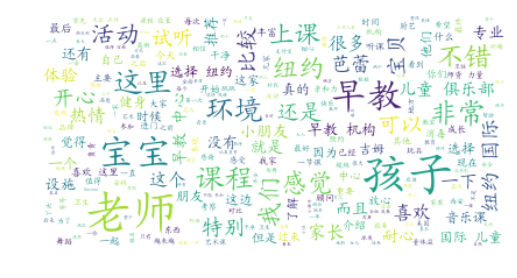

In [6]:
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 图像模式
在参数中加入一张图片的路径，会生成基于图像形状的词云

In [10]:
wordCloud2 = makeCloud.toCloud('纽约国际儿童俱乐部(高新尚中心)',\
                               makeCloud.searchShopAllContent('纽约国际儿童俱乐部(高新尚中心)'),mask_path='./graph.jpg')

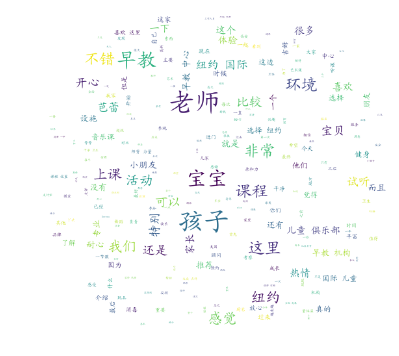

In [11]:
plt.imshow(wordCloud2)
plt.axis('off')
plt.show()

## 三，差评的关键词获取

### 差评展示
![店铺评分](./截图展示/差评.png)

差评1：支付宝买的活动，居然说是双12的活动过期了！明明写的下单30天内使用！不接待不让参加，无奈之下只好退了，只是想来给大家说说，早教有千万家，唯独这家不怎么滴，态度服务都超级差，千万别把孩子带着这了，很失望！  
差评2：我简直对你们太失望了，这么多活动，我就参加了支付宝一次1块钱活动，那种是领券的。好么这次发现那个参加完就不能参加了，但是你们出了另一个活动，支付宝付款已经成功，如图所示！说是在付款一个月内完成课程就可以，你们家倒好，给我说这是双12活动，已经不能参加了，那我怎么付的款？支付宝明明写的30天内，好么你们说之前参加过这回不能参加了，我带着我二孩儿不行么，对，这回我不带，我家人带总可以吧，你们知道个屁！你们那个叫mandy的，什么玩意儿，非要让我买你们家课程，我觉得那个什么mandy适合做推销的，别当什么老师，你不配ok，太倒胃口了！  
差评3：环境是看起来还不错，但是老师的态度就算了吧，很久前说给我们安排试听课，之后就没动静了。我还主动去了解，半天没人理我，老师过来过去看都不看孩子一眼，我就去问价格，人家老师说你等一下让老师过来给介绍，就没动静了

In [3]:
worstKeyword = makeCloud.findKeyWord(makeCloud.searchShopWorstComment('纽约国际儿童俱乐部(高新尚中心)'))

In [4]:
worstKeyword

'你们;老师;参加;支付宝;mandy;没动静;活动;付款;课程;这回;那个;倒胃口;不能;30;人带'

可以看出差评的关键词中存在大量无意义词。应寻找优化策略或使用全部差评内容。

## 四，差评词云的生成

In [6]:
worstCloud = makeCloud.toCloud('纽约国际儿童俱乐部(高新尚中心)',makeCloud.searchShopWorstComment('纽约国际儿童俱乐部(高新尚中心)'))

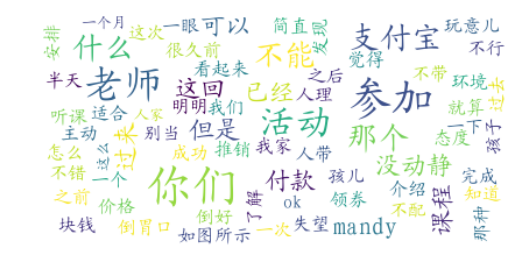

In [7]:
plt.imshow(worstCloud)
plt.axis('off')
plt.show()

当店名输入错误时有相应的出错处理

In [8]:
makeCloud.searchShopWorstComment('西安交通大学')

'请检查输入的店名！'